In [1]:
import pandas as pd
stock_data = pd.read_csv('Netflix_Dataset.csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
04-03-2019,359.72,362.25,348.04,351.04,"74,86,996"
05-03-2019,351.46,356.17,348.25,354.30,"59,37,754"
06-03-2019,353.60,359.88,351.70,359.61,"62,11,895"
07-03-2019,360.16,362.86,350.50,352.60,"61,51,331"
08-03-2019,345.75,349.92,342.47,349.60,"68,98,838"


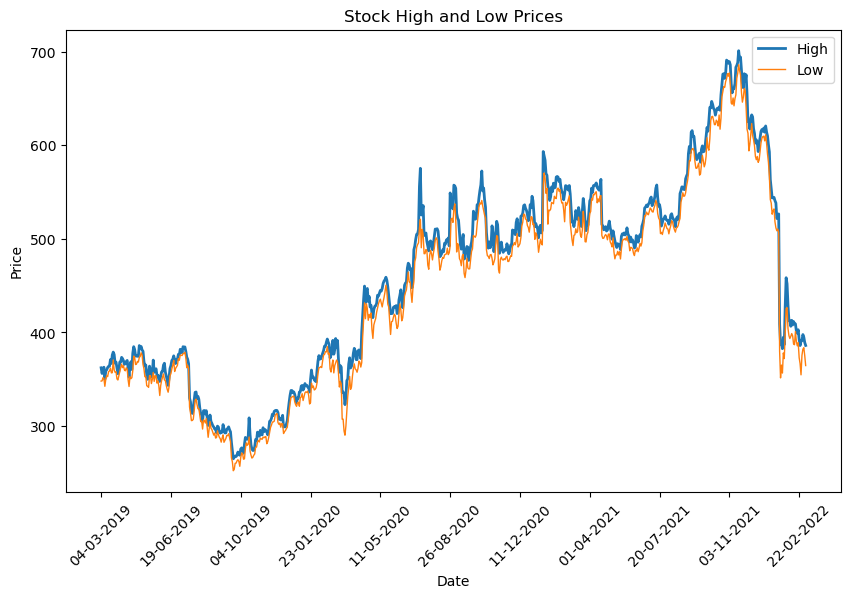

In [3]:
import matplotlib.pyplot as plt

# Assuming 'stock_data' has a 'Date' column or is using Date as the index

plt.figure(figsize=(10, 6))
plt.plot(stock_data['High'], label='High', linewidth=2)
plt.plot(stock_data['Low'], label='Low', linewidth=1)

# Adding labels and title
plt.title('Stock High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotating the x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Optionally, limit the number of x-ticks for better readability
plt.xticks(stock_data.index[::len(stock_data)//10])  # Adjust the step size based on your data size

# Show the plot
plt.show()

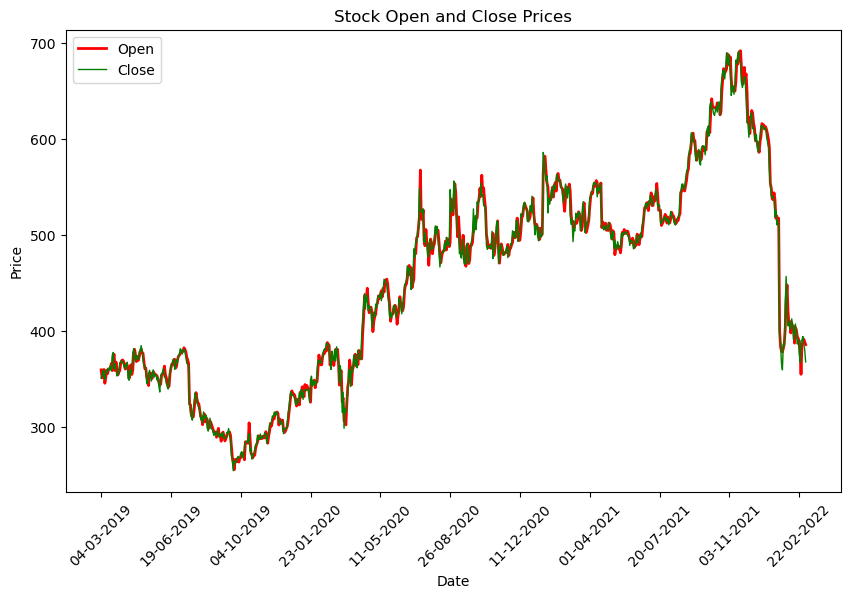

In [4]:
# Assuming 'stock_data' has a 'Date' column or is using Date as the index

plt.figure(figsize=(10, 6))

plt.plot(stock_data['Open'], label='Open', color='red', linewidth=2)

plt.plot(stock_data['Close'], label='Close', color='green', linewidth=1)

# Adding labels and title

plt.title('Stock Open and Close Prices')

plt.xlabel('Date')

plt.ylabel('Price')

plt.legend()

# Rotating the x-axis labels to avoid overlap

plt.xticks(rotation=45)

# Optionally, limit the number of x-ticks for better readability

plt.xticks(stock_data.index[::len(stock_data)//10])  # Adjust the step size based on your data size

# Show the plot

plt.show()

#LSTM Model


In [8]:
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/376.0 MB 5.0 MB/s eta 0:01:15
   ---------------------------------------- 1.8/376.0 MB 4.4 MB/s eta 0:01:26
   ---------------------------------------- 2.9/376.0 MB 4.4 MB/s eta 0:01:25
   ---------------------------------------- 3.7/376.0 MB 4.3 MB/s eta 0:01:28
   ---------------------------------------- 4.5/376.0 MB 4.2 MB/s eta 0:01:29
    --------------------------------------- 5.2/376.0 MB 4.1 MB/s eta 0:01:30
    --------------------------------------- 6.0/376.0 MB 4.1 MB/s eta 0:01:31
    --------------------------------------- 7.1/376.0 MB 4.1 MB/s eta 0:01:31
    --------------------------------------- 7.9/376.0 MB 4.1 MB/s eta 0:01:31
    --------------------------------------- 8.7/376.0 MB 4.0 MB/s eta 0:01:31
   - -------------------------------------- 9.4/376.0 MB 4.0 MB/s eta 0:01:32
   - -------------------------------------- 10.2/376.0 MB 4.0 MB/s eta 

In [9]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import *

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split

from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt


# Data Processing

In [10]:
#Data Preprocessing

target_y = stock_data['Close']

X_feat = stock_data.iloc[:,0:3]

stock_data = stock_data[['Open', 'High', 'Low', 'Close']]

In [11]:
#Feature Scaling

sc = StandardScaler()

stock_data_ft = sc.fit_transform(stock_data.values)

stock_data_ft = pd.DataFrame(columns=stock_data.columns,

                            data=stock_data_ft,

                            index=stock_data.index)

In [12]:
def lstm_split(data, n_steps):

    X, y = [], []

    for i in range(len(data) - n_steps):

        # Extract a window of size `n_steps` for features

        X.append(data[i:i + n_steps, :-1])  # All but last column

        # Extract the `n_steps`-th target value

        y.append(data[i + n_steps - 1, -1])  # Target value (last column)

    return np.array(X), np.array(y)

# Train and Test sets

In [13]:
X1, y1 = lstm_split(stock_data_ft.values, n_steps=1)

train_split=0.8

split_idx= int(np.ceil(len(X1)*train_split))

date_index = stock_data_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx:]

y_train, y_test = y1[:split_idx], y1[split_idx:]

X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1. shape, X_train. shape, X_test.shape, y_test.shape)

(757, 1, 3) (606, 1, 3) (151, 1, 3) (151,)


# building LSTM model

In [15]:
# Define LSTM Model using Input() for better practice
lstm = Sequential()

# Input Layer + LSTM
lstm.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(LSTM(32, activation='relu', return_sequences=True))

# Output Layer
lstm.add(Dense(1))

# Compile the Model
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Print Model Summary
lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 1, 32)          │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1)           │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,641 (18.13 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.2, verbose=2, shuffle=False)



Epoch 1/100
121/121 - 4s - 37ms/step - loss: 0.5873 - val_loss: 0.3626
Epoch 2/100
121/121 - 1s - 5ms/step - loss: 0.1365 - val_loss: 0.1063
Epoch 3/100
121/121 - 1s - 5ms/step - loss: 0.0162 - val_loss: 0.0103
Epoch 4/100
121/121 - 1s - 8ms/step - loss: 0.0137 - val_loss: 0.0087
Epoch 5/100
121/121 - 1s - 7ms/step - loss: 0.0135 - val_loss: 0.0086
Epoch 6/100
121/121 - 1s - 9ms/step - loss: 0.0133 - val_loss: 0.0087
Epoch 7/100
121/121 - 1s - 5ms/step - loss: 0.0131 - val_loss: 0.0087
Epoch 8/100
121/121 - 1s - 4ms/step - loss: 0.0129 - val_loss: 0.0088
Epoch 9/100
121/121 - 1s - 5ms/step - loss: 0.0127 - val_loss: 0.0089
Epoch 10/100
121/121 - 1s - 6ms/step - loss: 0.0126 - val_loss: 0.0089
Epoch 11/100
121/121 - 1s - 9ms/step - loss: 0.0125 - val_loss: 0.0090
Epoch 12/100
121/121 - 1s - 9ms/step - loss: 0.0124 - val_loss: 0.0090
Epoch 13/100
121/121 - 2s - 15ms/step - loss: 0.0123 - val_loss: 0.0090
Epoch 14/100
121/121 - 1s - 6ms/step - loss: 0.0123 - val_loss: 0.0090
Epoch 15/100


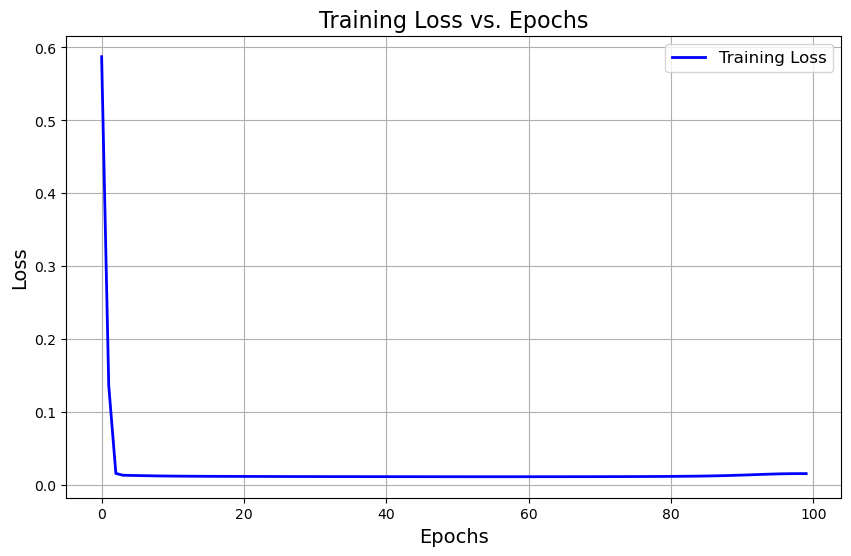

In [17]:
# Plot the training loss

plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot

plt.title('Training Loss vs. Epochs', fontsize=16)

plt.xlabel('Epochs', fontsize=14)

plt.ylabel('Loss', fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

plt.show()

# Performance Evaluation on Test set

In [18]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


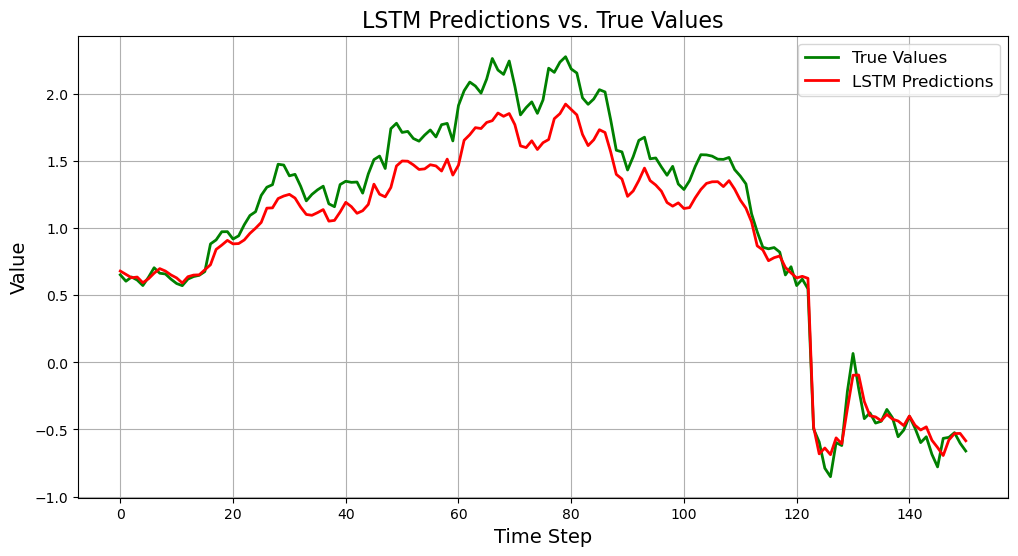

In [19]:
#If n = 1

import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension

y_test_flat = y_test.squeeze()

y_pred_flat = y_pred.squeeze()

# Plot the true values and predictions

plt.figure(figsize=(12, 6))

plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)

plt.plot(y_pred_flat, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend

plt.title("LSTM Predictions vs. True Values", fontsize=16)

plt.xlabel("Time Step", fontsize=14)

plt.ylabel("Value", fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

# Show the plot

plt.show()

In [20]:
mse = mean_squared_error(y_test, y_pred_flat)

rmse = np.sqrt(mse)

mape = mean_absolute_percentage_error(y_test, y_pred_flat)

print("RMSE: ",rmse)

print("MAPE: ", mape)

RMSE:  0.20349590818777227
MAPE:  0.140414047604304


# let's make deeper LSTM for better result

In [22]:
# Define LSTM Model
lstm = Sequential()

# Input layer + first LSTM
lstm.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(LSTM(50, activation='relu', return_sequences=True))

# Second LSTM
lstm.add(LSTM(50, activation='relu', return_sequences=True))

# Third LSTM (no return_sequences since it's the last LSTM before Dense)
lstm.add(LSTM(50, activation='relu'))

# Output layer
lstm.add(Dense(1))

# Compile the model
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Model summary
lstm.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 1, 50)          │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 1, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history=lstm.fit(X_train, y_train,

                 epochs=100, batch_size=4,

                 verbose=2, shuffle=False)

y_pred = lstm.predict(X_test)

Epoch 1/100
152/152 - 11s - 69ms/step - loss: 0.6991
Epoch 2/100
152/152 - 1s - 6ms/step - loss: 0.0657
Epoch 3/100
152/152 - 2s - 10ms/step - loss: 0.0238
Epoch 4/100
152/152 - 1s - 7ms/step - loss: 0.0201
Epoch 5/100
152/152 - 1s - 8ms/step - loss: 0.0179
Epoch 6/100
152/152 - 1s - 7ms/step - loss: 0.0160
Epoch 7/100
152/152 - 1s - 7ms/step - loss: 0.0146
Epoch 8/100
152/152 - 1s - 6ms/step - loss: 0.0133
Epoch 9/100
152/152 - 1s - 5ms/step - loss: 0.0122
Epoch 10/100
152/152 - 1s - 6ms/step - loss: 0.0114
Epoch 11/100
152/152 - 1s - 10ms/step - loss: 0.0106
Epoch 12/100
152/152 - 1s - 9ms/step - loss: 0.0098
Epoch 13/100
152/152 - 1s - 7ms/step - loss: 0.0091
Epoch 14/100
152/152 - 1s - 7ms/step - loss: 0.0086
Epoch 15/100
152/152 - 1s - 8ms/step - loss: 0.0081
Epoch 16/100
152/152 - 1s - 7ms/step - loss: 0.0076
Epoch 17/100
152/152 - 1s - 7ms/step - loss: 0.0071
Epoch 18/100
152/152 - 1s - 9ms/step - loss: 0.0068
Epoch 19/100
152/152 - 1s - 8ms/step - loss: 0.0064
Epoch 20/100
152/

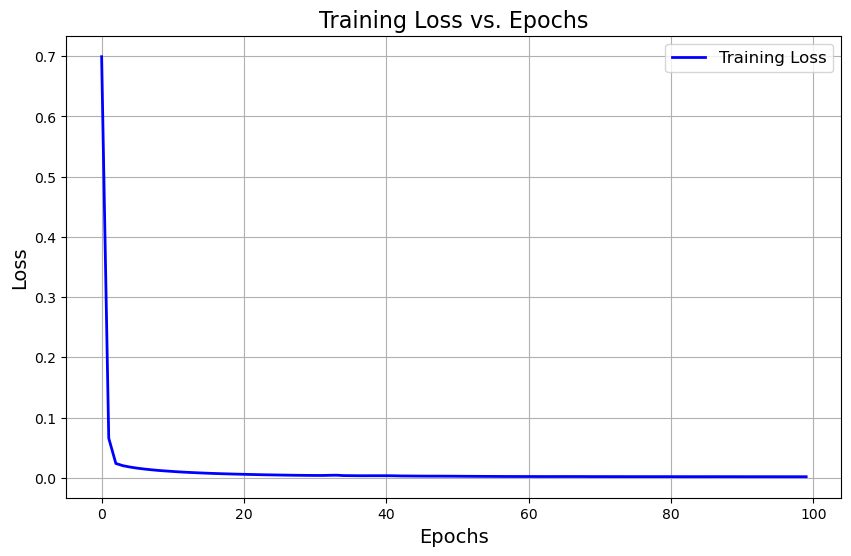

In [24]:
# Plot the training loss

plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot

plt.title('Training Loss vs. Epochs', fontsize=16)

plt.xlabel('Epochs', fontsize=14)

plt.ylabel('Loss', fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

plt.show()

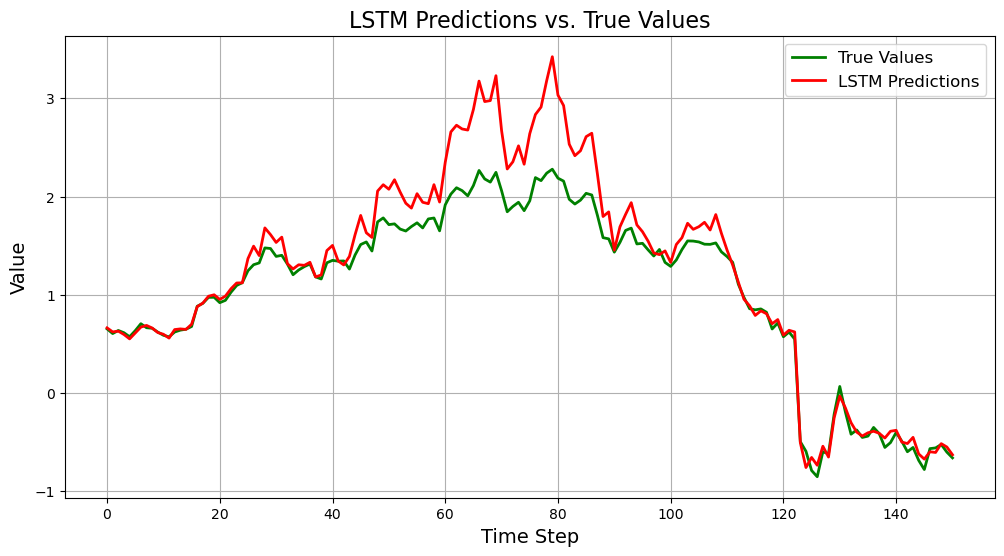

In [25]:
import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension

y_test_flat = y_test.squeeze()

# Plot the true values and predictions

plt.figure(figsize=(12, 6))

plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)

plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend

plt.title("LSTM Predictions vs. True Values", fontsize=16)

plt.xlabel("Time Step", fontsize=14)

plt.ylabel("Value", fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

# Show the plot

plt.show()

In [26]:
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE: ",rmse)

print("MAPE: ", mape)

RMSE:  0.32450854448725874
MAPE:  0.1374034290044829


# same model but incresing time steps

In [27]:
n_steps=10

X1, y1 = lstm_split(stock_data_ft.values, n_steps=n_steps)

train_split=0.8

split_idx = int(np.ceil(len(X1)*train_split))

date_index = stock_data_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx:]

y_train, y_test = y1[:split_idx], y1[split_idx:]

X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:-n_steps]

print(X1.shape, X_train.shape, X_test.shape, X_test_date.shape, y_test.shape)

(748, 10, 3) (599, 10, 3) (149, 10, 3) (149,) (149,)


In [28]:
# Define LSTM Model
lstm = Sequential()

# Input layer + first LSTM
lstm.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
lstm.add(LSTM(50, activation='relu', return_sequences=True))

# Second LSTM
lstm.add(LSTM(50, activation='relu', return_sequences=True))

# Third LSTM (no return_sequences since it's the last LSTM before Dense)
lstm.add(LSTM(50, activation='relu'))

# Output layer
lstm.add(Dense(1))

# Compile the model
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Model summary
lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 10, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,251 (200.20 KB)

 Trainable params: 51,251 (200.20 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history=lstm.fit(X_train, y_train,

                 epochs=100, batch_size=4,

                 verbose=2, shuffle=False)

Epoch 1/100
150/150 - 11s - 76ms/step - loss: 0.1513
Epoch 2/100
150/150 - 4s - 27ms/step - loss: 0.0773
Epoch 3/100
150/150 - 2s - 14ms/step - loss: 0.0399
Epoch 4/100
150/150 - 3s - 17ms/step - loss: 0.0345
Epoch 5/100
150/150 - 4s - 24ms/step - loss: 0.0324
Epoch 6/100
150/150 - 4s - 27ms/step - loss: 0.0329
Epoch 7/100
150/150 - 2s - 14ms/step - loss: 0.0272
Epoch 8/100
150/150 - 4s - 25ms/step - loss: 0.0246
Epoch 9/100
150/150 - 3s - 22ms/step - loss: 0.0213
Epoch 10/100
150/150 - 2s - 15ms/step - loss: 0.0203
Epoch 11/100
150/150 - 3s - 21ms/step - loss: 0.0186
Epoch 12/100
150/150 - 4s - 27ms/step - loss: 0.0172
Epoch 13/100
150/150 - 2s - 13ms/step - loss: 0.0160
Epoch 14/100
150/150 - 3s - 23ms/step - loss: 0.0145
Epoch 15/100
150/150 - 3s - 18ms/step - loss: 0.0133
Epoch 16/100
150/150 - 3s - 19ms/step - loss: 0.0117
Epoch 17/100
150/150 - 3s - 20ms/step - loss: 0.0112
Epoch 18/100
150/150 - 3s - 18ms/step - loss: 0.0104
Epoch 19/100
150/150 - 4s - 29ms/step - loss: 0.0093
E

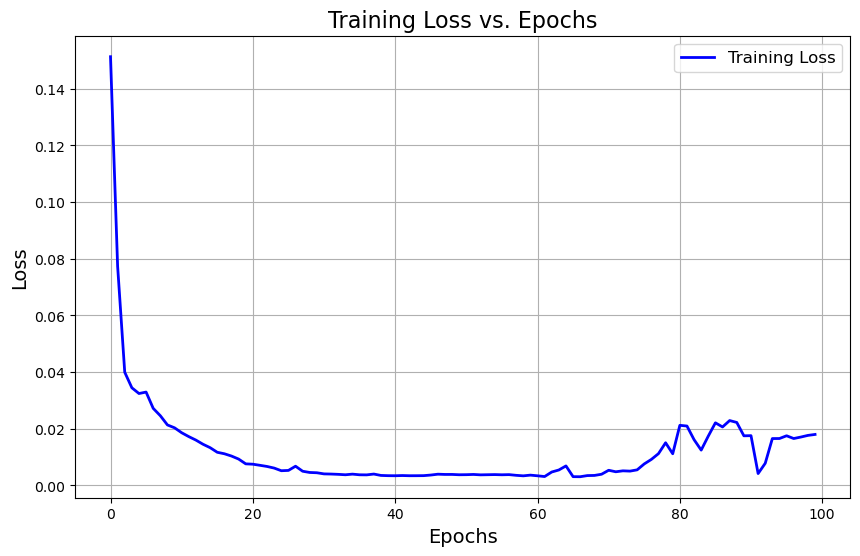

In [30]:
# Plot the training loss

plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)

# Annotating the plot

plt.title('Training Loss vs. Epochs', fontsize=16)

plt.xlabel('Epochs', fontsize=14)

plt.ylabel('Loss', fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

plt.show()

In [32]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


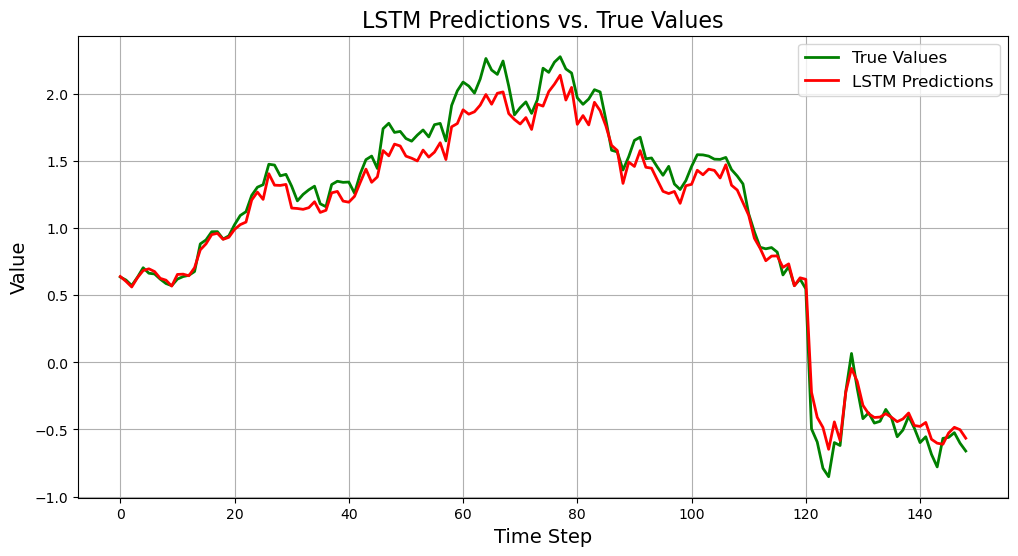

In [33]:
import matplotlib.pyplot as plt

# Ensure y_test is squeezed (flattened) if it has an extra dimension

y_test_flat = y_test.squeeze()

# Plot the true values and predictions

plt.figure(figsize=(12, 6))

plt.plot(y_test_flat, label="True Values", color="green", linewidth=2)

plt.plot(y_pred, label="LSTM Predictions", color="red", linewidth=2)

# Add labels, title, and legend

plt.title("LSTM Predictions vs. True Values", fontsize=16)

plt.xlabel("Time Step", fontsize=14)

plt.ylabel("Value", fontsize=14)

plt.legend(fontsize=12)

plt.grid(True)

# Show the plot

plt.show()

In [34]:
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mape = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE: ",rmse)

print("MAPE: ", mape)

RMSE:  0.11952334911914844
MAPE:  0.09132300400816384


# LSTM vs. Simple Moving Average vs. Exponential Moving Average

Test RMSE: 100.354
Test MAPE: 0.163


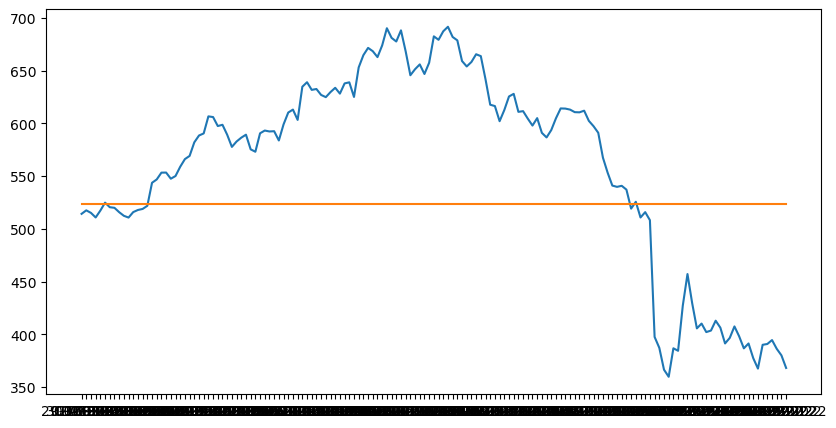

In [35]:
#Simple Moving Average
train_split = 0.8

split_idx = int(np.ceil(len(stock_data)*train_split))

train = stock_data[['Close']].iloc[:split_idx]

test = stock_data[['Close']].iloc[split_idx:]

test_pred = np.array([train.rolling(10).mean().iloc[-1]]*len(test)).reshape((-1,1))

print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, test_pred)))

print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_pred))

plt.figure(figsize=(10,5))

plt.plot(test)

plt.plot(test_pred)

plt.show()

C:\Users\krima\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\krima\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\krima\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\krima\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\krima\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=Fa

Test RMSE: 100.244
Test MAPE: 0.163


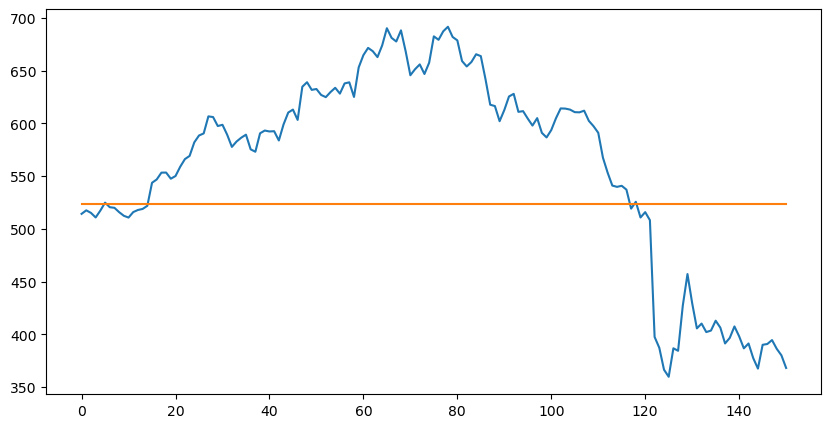

In [37]:
#Exponential Moving Average
from statsmodels.tsa.api import SimpleExpSmoothing

X = stock_data[['Close']].values

train_split = 0.8

split_idx = int(np.ceil(len(X)*train_split))

train = X[:split_idx]

test = X[split_idx:]

test_concat = np.array([]).reshape((0,1))

for i in range(len(test)):

  train_fit = np.concatenate((train, np.asarray(test_concat)))

  fit = SimpleExpSmoothing(np.asarray(train_fit)).fit(smoothing_level=0.1)

  test_pred = fit.forecast(1)

  test_concat = np.concatenate((np.asarray(test_concat), test_pred.reshape((-1,1))))

# The change is here: Using test_concat instead of test_pred for RMSE calculation

print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(test, test_concat)))  

print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_concat))

plt.figure(figsize=(10,5))

plt.plot(test)

plt.plot(test_concat)

plt.show()